In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 20)

### Import the file and assign it to a variable name auto_mpg.  Another variable called attribute contains a list of the column names.  The list of attributes was assigned to the DataFrame as column names.

In [2]:
auto_mpg = pd.read_csv('auto_mpg.csv')
attribute = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model_year', 'origin', 'car_name']
auto_mpg.columns = attribute
auto_mpg.head(), auto_mpg.count()

(    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
 0  15.0          8         350.0        165    3693          11.5          70   
 1  18.0          8         318.0        150    3436          11.0          70   
 2  16.0          8         304.0        150    3433          12.0          70   
 3  17.0          8         302.0        140    3449          10.5          70   
 4  15.0          8         429.0        198    4341          10.0          70   
 
    origin            car_name  
 0       1   buick skylark 320  
 1       1  plymouth satellite  
 2       1       amc rebel sst  
 3       1         ford torino  
 4       1    ford galaxie 500  , mpg             397
 cylinders       397
 displacement    397
 horsepower      397
 weight          397
 acceleration    397
 model_year      397
 origin          397
 car_name        397
 dtype: int64)

### Some of the variables in horsepower columns are '?' and it needs to be converted to NaN.

In [3]:
auto_mpg[auto_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
31,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
125,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
329,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
373,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [4]:
auto_mpg['horsepower'].replace('?', np.nan, inplace=True)

In [5]:
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### The origin column denotes country of manufacture and uses numbers to assign countries.  These numbers are now converted to country names.

In [6]:
country_name={1: 'USA', 2: 'Asia', 3: 'Europe'}
auto_mpg['origin'].replace(country_name, inplace=True)
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
4,15.0,8,429.0,198,4341,10.0,70,USA,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,USA,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,USA,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,USA,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,USA,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,USA,dodge challenger se


### Display a bar chart with the cylinder and count of vehicles with indicated cylinders.  According to the bar graph below, a four cylinder engine is the most common in use for vehicles.  Although rare, three and five cylinder engines are also used.

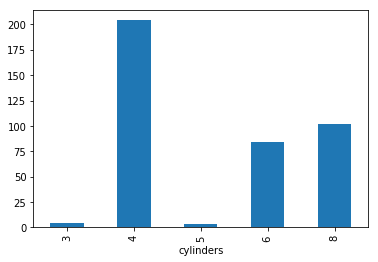

In [7]:
cylinders = auto_mpg[['cylinders', 'origin']]
cylinders = cylinders.groupby('cylinders').count()
cylinders.plot(kind='bar', legend = False)

### Using a scatter plot, we can show the relationship between horsepower and weight.  Since we can't plot NaN values, rows containing NaN values will be dropped.  As a result of this drop, we lose 6 rows.  Two lines of code were also used to convert horsepower data from str to int.

In [8]:
auto_mpg.dropna(how='any', inplace=True)
horsepower = auto_mpg['horsepower'].astype(int)
auto_mpg['horsepower'] = horsepower

In [9]:
auto_mpg.count()

mpg             391
cylinders       391
displacement    391
horsepower      391
weight          391
acceleration    391
model_year      391
origin          391
car_name        391
dtype: int64

### The scatter plot below indicates a very weak negative correlation between acceleration and weight.  This could be due to the fact that acceleration in a vehicle may be dependent on other variables not accounted for.

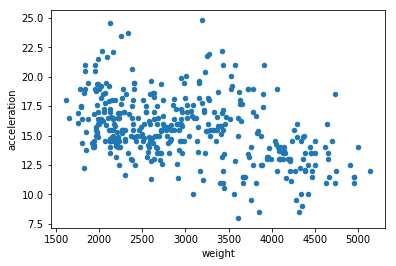

In [10]:
weight_accel = auto_mpg[['weight', 'acceleration']]
weight_accel.plot(kind='scatter', x='weight', y='acceleration')

# Is there a correlation between different variables such as weight, horsepower, cylinders, displacement, and acceleration?  Using a scatter matrix, we can plot all the variables in a 5 x 5 grid display.  

In [11]:
from pandas.plotting import scatter_matrix

### From the matrix below, the first correlation we see is how the number of cylinders has a positive correlation with displacement, horsepoewr, and weight.  More cylinders equate to more total displacement.  This, in turn, means a bigger engine size resulting in higher weight.  More cylinder and higher displacement also results in more horsepower.  

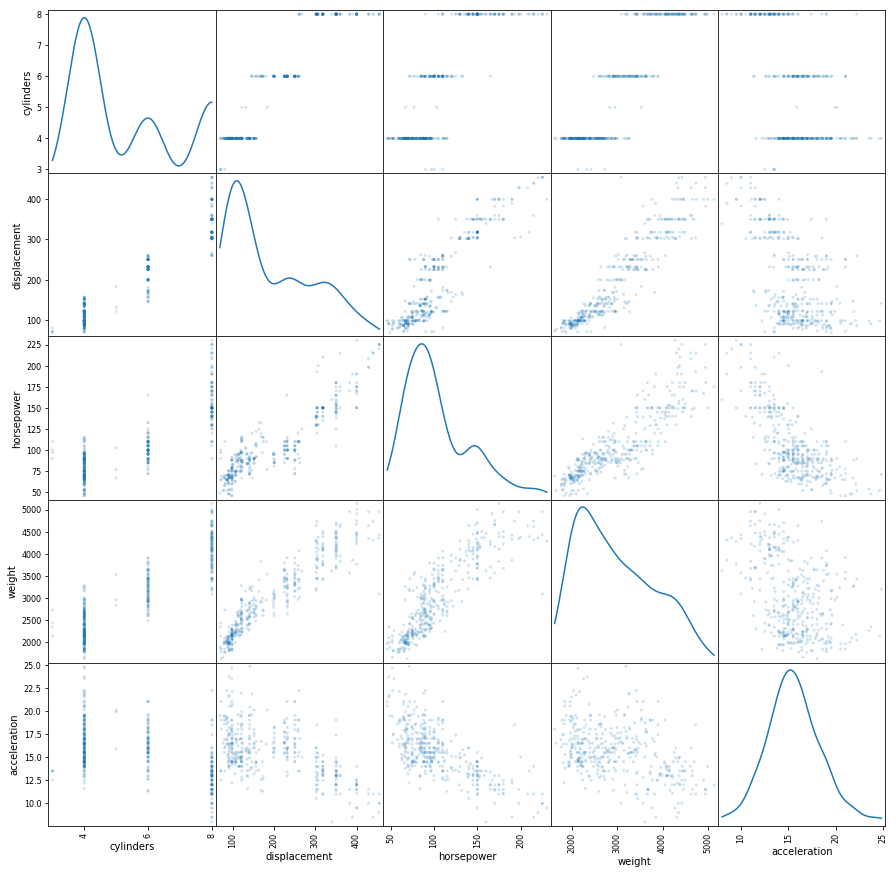

In [12]:
variable_matrix = pd.DataFrame(auto_mpg, columns = ['cylinders', 'displacement',
                                                   'horsepower', 'weight', 'acceleration'])
scatter_matrix(variable_matrix, alpha=.2, figsize=(15,15), diagonal = 'kde');

### With the correlation between the variable displacement and other variables weight, horsepower, and cylinders, a linear regression model can be used to properly display the positive correlation as shown by the three charts below.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


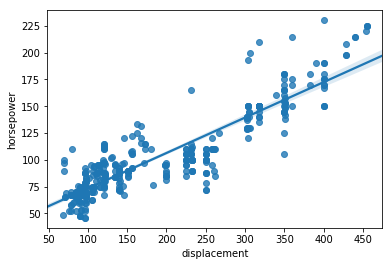

In [13]:
sns.regplot(x='displacement', y='horsepower', data=auto_mpg);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


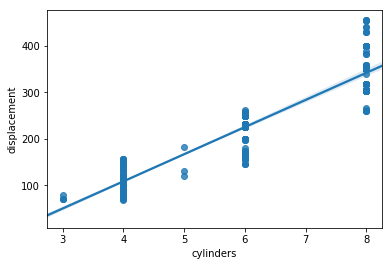

In [14]:
sns.regplot(x='cylinders', y='displacement', data=auto_mpg)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


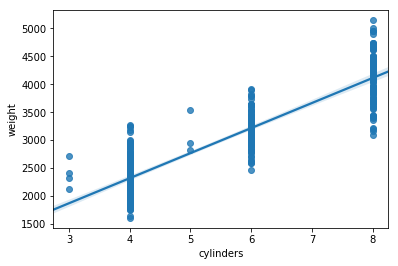

In [15]:
sns.regplot(x='cylinders', y='weight', data=auto_mpg)